# Области видимости

Область видимости — это часть программы, в которой можно обращаться к определённой переменной или функции. В Python области видимости определяют, где и как можно использовать переменные.

 Например:

In [ ]:
def func():
  a = 8

print(a)

NameError: name 'a' is not defined

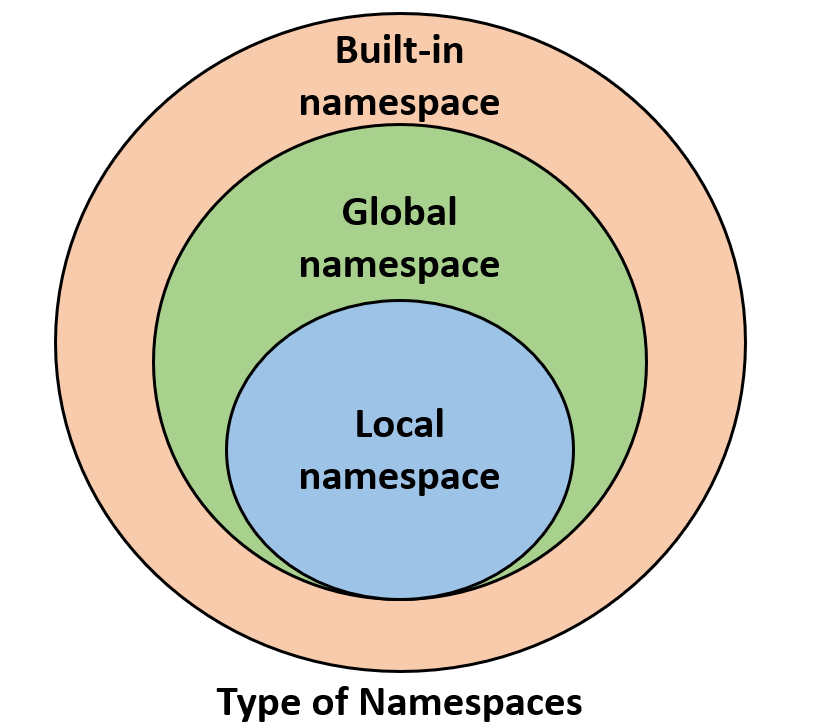

## Build-in

Встроенная область видимости в Python содержит предопределенные функции, типы и исключения, которые доступны в любой части программы. Эта область видимости загружается автоматом при запуске интерпретатора Python и доступна в любом месте программы.

Python предоставляет множество встроенных функций и атрибутов. Некоторые из них:

* `print()` - используется для вывода данных на экран.

* `len()` - возвращает длину объекта (списка, строки и т.д.).

* `type()` - возвращает тип объекта.

* `input()` - считывает строку ввода от пользователя.



## Global (глобальный namespace)

Глобальная область видимости в Python охватывает все переменные, определенные на самом верхнем уровне скрипта или модуля.

Глобальные переменные объявляются вне всех функций и доступны для использования в любом месте программы. Их жизненный цикл продолжается на протяжении всего выполнения программы

In [ ]:
global_variable = "Hi"

def func():
  print(global_variable) # считается глобальной

func()

Hi


In [ ]:
global_variable = "Hi"

def func():
  global global_variable # считается глобальной
  print(global_variable)
  global_variable = "Hihihihiih"

func()

Hi


In [ ]:
global_variable

'Hihihihiih'

In [ ]:
print(globals())

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', 'def my_func():\n    print("Hi")', 'def once(func):\n    counter = 0\n    def wrapper(*args, **kwargs):\n      if counter == 0: \n        return func(*args, **kwargs)\n      else:\n        print("НЕЗЯ")\n    return wrapper', 'def my_func():\n    print("Hi")', 'def once(func):\n    counter = 0\n    def wrapper(*args, **kwargs):\n      if counter == 0: \n        counter += 1\n        return func(*args, **kwargs)\n      else:\n        print("НЕЗЯ")\n    return wrapper', '@once', '@once\nmy_func()', '@once\ndef my_func():\n    print("Hi")', 'def my_func():\n    print("Hi")', 'def once(func):\n    counter = 0\n    def wrapper(*args, **kwargs):\n      if counter == 0: \n        counter += 1\n        return func(*args, **kwargs

## Local (локальный)

Локальная область видимости касается переменных, которые объявлены внутри *функции* или *лямбда-выражения*. Эти переменные доступны только в пределах функции, в которой они объявлены, и уничтожаются после завершения выполнения этой функции.

In [ ]:
def func():
  a = 8 # считается локальной
  print(locals())

func()

{'a': 8}


In [ ]:
global_variable = "Hi"

def func():
  global_variable = "Hihihihiih" # считается локальной
  print(global_variable)
func()

Hihihihiih


In [ ]:
global_variable

'Hi'

**Замечание:** Циклы и условия НЕ создают свою область видимости (namespace)

**Замечание:** Функции *создают* свой namespace

 **Замечание (для смешариков):**  Генераторы создают namespace

## Объемлющая область (Enclosing)

Когда у нас функция внутри функции (вложенные функции), внутренняя функция видит переменные внешней. Чтобы изменить переменную внешней функции, используем nonlocal.

### Global vs Nonlocal

`global` - перечисленные в инструкции переменные должны интерпретироваться как глобальные

`nonlocal` вызывает перечисленные имена для обозначения ранее определенных переменных в ближайшей области видимости, исключая глобальную

Что это значит?

In [ ]:
def outer():
    var = 'outer'

    def inner():
        global var
        var = 'inner'
        print('from inner:', var)

    inner()
    print('from outer:', var)

outer()
print('from global:', var)

from inner: inner
from outer: outer
from global: inner


In [ ]:
def outer():
    var = 'outer'

    def inner():
        nonlocal var
        var = 'inner'
        print('from inner:', var)

    inner()
    print('from outer:', var)

outer()
print('from global:', var)

from inner: inner
from outer: inner
from global: inner


## Поиск переменных по правилу LEGB

Когда Python встречает переменную, он ищет её в порядке:

1. Local — внутри текущей функции
2. Enclosing — во внешних функциях
3. Global — на уровне модуля
4. Built-in — встроенные имена (print, len и т.д.)

In [ ]:
x = "глобальный x"  # Global

def outer():
    x = "внешний x"  # Enclosing

    def inner():
        x = "внутренний x"  # Local
        print("Local:   ", x)

    inner()
    print("Enclosing:", x)

outer()
print("Global:   ", x)

Local:    внутренний x
Enclosing: внешний x
Global:    глобальный x


# Преамбула

Представь, что ты аналитик и часто пишешь функции для обработки данных. Понаписал уже штук 50 и тут к тебе подходит тимлид и говорит, что теперь мы хотим, чтобы после запуска каждой функии выводились еще и логи (ака какая-то доп информация, например, время работы, количество потребляемой памяти и тд).

Конечно, можно добавлять этот код в каждую функцию вручную, но это неудобно (и можно повеситься).

Вот тут и помогают декораторы – специальные функции, которые "оборачивают" (декорируют?) другие функции и добавляют к ним дополнительную логику, не изменяя их код

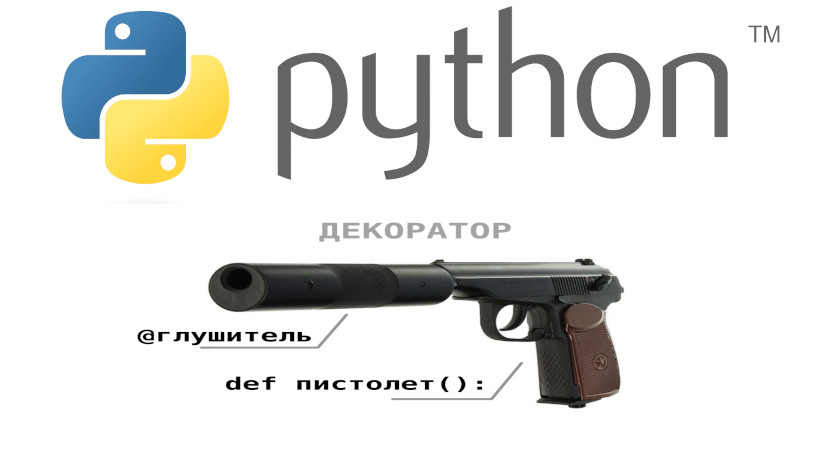

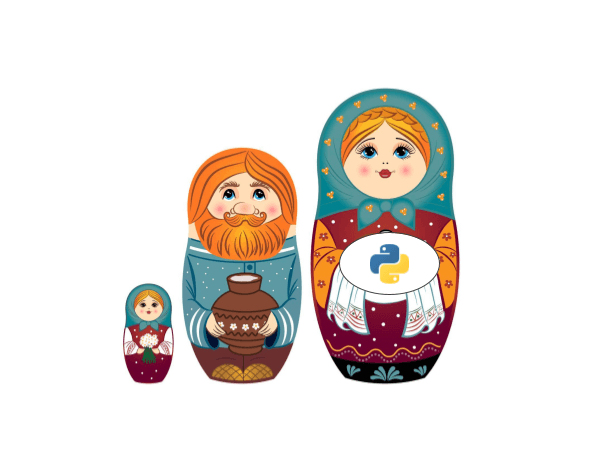

**Ремарка**

В Python с функциями можно делать следущие штуки:

· Присваивать переменным

· Передавать как аргументы
· Возвращать из других функций

In [ ]:
def say_hello():
    return "Привет!"

# Функцию можно присвоить переменной
greeting = say_hello
print(greeting())  # Привет!

# Функцию можно передать как аргумент
def call_twice(func):
    print(func())
    print(func())

call_twice(say_hello)

Привет!
Привет!
Привет!


# Декораторы

Допустим, у нас есть функция `greet`, которая выводит приветствие:

In [ ]:
def greet(name):
    print(f"Привет, {name}!")

greet("Иван")

Привет, Иван!


Мы хотим, чтобы перед каждым приветствием выводилась дата и время. Можно добавить эту строку прямо в функцию, но что если нам нужно использовать эту функциональность для нескольких функций? Применим декораторы:

In [ ]:
def deprecated(func):
    def wrapper(*args, **kwargs):  #
        print('WARNING: ' + func.__name__ +' is deprecated')
        return func(*args, **kwargs)
    return wrapper

def congrats(func):
    def wrapper(*args, **kwargs):  # Теперь внутренняя функция называется не inner, а wrapper (обертка)
        print('Congratulations: ' + func.__name__ +' is awesome function')
        return func(*args, **kwargs)
    return wrapper


@congrats
@deprecated
def own_max(a, b):
    'This is a really nice looking docstring'
    return a if a > b else b

own_max(1, 2)

Congratulations: wrapper is awesome function


2

In [ ]:
new_own_max = congrats(deprecated(own_max))

In [ ]:
new_own_max(1, 2)

Congratulations: inner is awesome function
Congratulations: wrapper is awesome function


2

In [ ]:
help(own_max)

Help on function wrapper in module __main__:

wrapper(*args, **kwargs)



Но у такого подхода есть проблема:

In [ ]:
print(own_max.__name__)
print(own_max.__doc__)

wrapper
None


**Решение 1** - явно переписать атрибуты функции `wrapper`:

In [ ]:
def deprecated(func):
    def wrapper(*args, **kwargs):
        print('WARNING: ' + func.__name__ +' is deprecated')
        return func(*args, **kwargs)
    wrapper.__name__ = func.__name__
    wrapper.__doc__ = func.__doc__
    wrapper.__module__ = func.__module__
    # Можем переписать и другие необходимые атрибуты
    return wrapper

@deprecated
def own_max(a, b):
    'This is a really nice looking docstring'
    return a if a > b else b

own_max(1, 2)

2

**Решение 2** - использовать декоратор из модуля `functools`:

In [ ]:
import functools

def deprecated(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        print('WARNING: ' + func.__name__ +' is deprecated')
        return func(*args, **kwargs)
    return wrapper

@deprecated
def own_max(a, b):
    'This is a really nice looking docstring'
    return a if a > b else b

@deprecated
def own_min(a, b):
    'This is a really nice looking docstring also'
    return a if a < b else b

print(own_max(1, 2))
print(own_min(1, 2))

print(own_max.__name__)
print(own_max.__doc__)

2
1
own_max
This is a really nice looking docstring


In [ ]:
help(functools.wraps)

Help on function wraps in module functools:

wraps(wrapped, assigned=('__module__', '__name__', '__qualname__', '__doc__', '__annotations__'), updated=('__dict__',))
    Decorator factory to apply update_wrapper() to a wrapper function
    
    Returns a decorator that invokes update_wrapper() with the decorated
    function as the wrapper argument and the arguments to wraps() as the
    remaining arguments. Default arguments are as for update_wrapper().
    This is a convenience function to simplify applying partial() to
    update_wrapper().



In [ ]:
print(own_min.__name__)
print(own_min.__doc__)

own_min
This is a really nice looking docstring also


Можем использовать декораторы и с аргументами:

In [ ]:
import sys

def trace(dest=sys.stderr):
    def wraps(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            print(func.__name__ , 'called with args', args,'kwargs', kwargs, file = dest)
            return func(*args, **kwargs)
        return wrapper
    return wraps

@trace(sys.stdout)
def f(x, test):
    if test > 1:
        return f(x, test / 2)

f('Hi!', test=42)

f called with args ('Hi!',) kwargs {'test': 42}
f called with args ('Hi!', 21.0) kwargs {}
f called with args ('Hi!', 10.5) kwargs {}
f called with args ('Hi!', 5.25) kwargs {}
f called with args ('Hi!', 2.625) kwargs {}
f called with args ('Hi!', 1.3125) kwargs {}
f called with args ('Hi!', 0.65625) kwargs {}


## Задача

Написать декоратор **once(function)**.<br>
Декоратор позволяет вызвать функцию только один раз.

In [ ]:
import functools

In [ ]:
def my_func():
    print("Hi")

In [ ]:
# TODO

In [ ]:
my_func()
my_func()

Hi
НЕЗЯ


In [ ]:
my_func.__doc__